# 马尔可夫链蒙特卡洛方法

蒙特卡洛法（Monte Carlo method) ， 也称为统计模拟方法 (statistical simulation method) ， 是通过从概率模型的随机抽样进行近似数值计

算的方法。 马尔可夫链陟特卡罗法 (Markov Chain Monte Carlo, MCMC)， 则是以马尔可夫链 (Markov chain）为概率模型的蒙特卡洛法。

马尔可夫链蒙特卡罗法构建一个马尔可夫链，使其平稳分布就是要进行抽样的分布， 首先基于该马尔可夫链进行随机游走， 产生样本的序列，

之后使用该平稳分布的样本进行近似数值计算。

Metropolis-Hastings算法是最基本的马尔可夫链蒙特卡罗法，Metropolis等人在 1953年提出原始的算法，Hastings在1970年对之加以推广，

形成了现在的形式。吉布斯抽样(Gibbs sampling)是更简单、使用更广泛的马尔可夫链蒙特卡罗法，1984 年由S. Geman和D. Geman提出。

马尔可夫链蒙特卡罗法被应用于概率分布的估计、定积分的近似计算、最优化问题的近似求解等问题，特别是被应用于统计学习中概率模型的学习

与推理，是重要的统计学习计算方法。

一般的蒙特卡罗法有**直接抽样法**、**接受-拒绝抽样法**、 **重要性抽样法**等。

接受-拒绝抽样法、重要性抽样法适合于概率密度函数复杂 （如密度函数含有多个变量，各变量相互不独立，密度函数形式复杂），不能直接抽样的情况。

### 19.1.2 数学期望估计

一舣的蒙特卡罗法， 如直接抽样法、接受·拒绝抽样法、重要性抽样法， 也可以用于数学期望估计 （estimation Of mathematical expectation)。

假设有随机变量$x$， 取值 $x\in X$, 其概率密度函数为 $p(x)$, $f(x)$ 为定义在 $X$ 上的函数， 目标是求函数 $f(x)$ 关于密度函数 $p(x)$ 的数学期望 $E_{p(x)}[f(x)]$。


针对这个问题，蒙特卡罗法按照概率分布 $p(x)$ 独立地抽取 $n$ 个样本$x_{1}, x_{2},...,x_{n}$，比如用以上的抽样方法，之后计算函
数$f(x)$的样本均值$\hat f_{n}$  

$$\hat f_{n} = \frac{1} {n}\sum_{i=1}^{n}f(x_{i})$$


作为数学期望$E_{p(x)}[f(x)]$近似值。

根据大数定律可知， 当样本容量增大时， 样本均值以概率1收敛于数学期望：  

$$\hat f_{n} \rightarrow E_{p(x)}[f(x)], n \rightarrow \infty $$

这样就得到了数学期望的近似计算方法：  

$$E_{p(x)}[f(x)] \approx \frac{1} {n}\sum_{i=1}^{n}f(x_{i})$$

### 马尔可夫链 

考虑一个随机变量的序列 $X = {X_{0}, X_{1},..., X(t),...}$ 这里 $X_{t}$，表示时刻 $t$ 的随机变量， $t = 0, 1, 2...$. 

每个随机变量 $X_{t}(t=0,1,2,...)$ 的取值集合相同， 称为状态空间， 表示为$S$.  随机变量可以是离散的， 也可以是连续的。

以上随机变量的序列构成随机过程（stochastic process)。

假设在时刻 $0$ 的随机变量 $X_{0}$ 遵循概率分布 $P(X_{0}) = \pi$，称为初始状态分布。在某个时刻 $t>=1$ 的随机变量 $X_{t}$与前

一个时刻的随机变量 $X_{t-1}$ 之间有条件分布 $P(X_{t}|X_{t-1})$ 如果 $X_{t}$ 只依赖于 $X_{t-1}$, 而不依赖于过去的随机变量 

${X_{0}，X_{1},...，X_{t-2}}$ 这一性质称为马尔可夫性，即  

$P(X_{t}|X_{0},X_{1},...,X_{t-1}) = P(X_{t}|X_{t-1}), t=1,2,...$

具有马尔可夫性的随机序列$X = {X_{0}, X_{1},..., X(t),...}$称为马尔可夫链， 或马尔可夫过程（Markov process)。 条件概率分布 

$P(X_{t}|X_{t-1})$ 称为**马尔可夫链的转移概率分布**。 **转移概率分布决定了马尔可夫裢的特性**。


#### 平稳分布  

设有马尔可夫链$X = {X_{0}, X_{1},..., X(t),...}$，其状态空间为 $S$,转移概率矩阵为 $P=(p_{ij})$， 如果存在状态空间 $S$ 上的一个分布  

$\pi = \begin{bmatrix}
\pi_{1}\\ 
\pi_{2}\\ 
\vdots \end{bmatrix}$

使得  

$\pi = P\pi$

则称丌为马尔可夫裢$X = {X_{0}, X_{1},..., X(t),...}$的平稳分布。


直观上，如果马尔可夫链的平稳分布存在，那么以该平稳分布作为初始分布，面向未来进行随机状态转移，之后任何一个时刻的状态分布都是该平稳分布。

**引理**

给定一个马尔可夫链$X = {X_{0}, X_{1},..., X(t),...}$, 状态空间为$S$, 移概率矩阵为$P=(p_{ij})$， 则分布 $\pi=(\pi_{1}, \pi_{2},...)^{T}$ 为 $X$ 的平稳分布的充要条件是$\pi=(\pi_{1}, \pi_{2},...)^{T}$是下列方程组的解：

$x_{i} = \sum_{j}p_{ij}x_{j}, i=1,2,...$  

$x_{i} >= 0, i = 1,2,...$  

$\sum_{i}x_{i} = 1$  


### 吉布斯采样

输入： 目标概率分布的密度函数$p(x)$, 函数$f(x)$;

输出： $p(x)$的随机样本 $x_{m+1}, x_{m+2}, ..., x_{n}$，函数样本均值 $f_{mn}$;

参数： 收敛步数$m$, 迭代步数 $n$.


1. 初始化。给出初始样本 $x^{0} = $($x^{0}_{1}, x^{0}_{2},..., x^{0}_{k}$)$^{T}$.

2. 对$i$循环执行  
 设第$i-1$次迭代结束前的样本为$x^{i-1} = $($x^{i-1}_{1}, x^{i-1}_{2},..., x^{i-1}_{k}$)$^{T}$，则第$i$次迭代进行如下几步操作：  

 + (1)由满条件分布 $p(x_{1}|x^{i-1}_{2},...,x^{i-1}_{k})$ 抽取 $x^{i}_{1}$  
 
 + ...
 
 + (j)由满条件分布 $p(x_{j}|x^{i}_{1},...,x^{i}_{j-1}, x^{i-1}_{j+1},..., x^{i-1}_{k})$ 抽取 $x^{i}_{j}$   
 
 + (k)由满条件分布 $p(x_{k}|x^{i}_{1},...,x^{i}_{k})$ 抽取 $x^{i}_{k}$ 
 
得到第 $i$ 次迭代值 $x^{(i)} = (x^{(i)}_{1}, x^{(i)}_{2},..., x^{(i)}_{k})^{T}$.


 3. 得到样本集合
    
 {$x^{(m+1)}, x^{(m+2)},..., x^{(n)}$}
 
 4. 计算
 
 $f_{mn} = \frac{1}{n-m}\sum_{i=m+1}^{n}f(x^{(i)})$

具体细节可以看看周志华机器学习或者网上找找

MCMC蒙特卡罗方法： https://www.cnblogs.com/pinard/p/6625739.html

In [9]:
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

transfer_matrix = np.array([[0.6,0.2,0.2],[0.3,0.4,0.3],[0,0.3,0.7]],dtype='float32') #设置转移矩阵
start_matrix = np.array([[0.5,0.3,0.2]],dtype='float32') # 初始矩阵

for i in range(30):
    start_matrix = np.dot(start_matrix,transfer_matrix)
    print("当前进度:",i)
    print(start_matrix)


当前进度: 0
[[0.39000002 0.28       0.32999998]]
当前进度: 1
[[0.31800002 0.289      0.393     ]]
当前进度: 2
[[0.27750003 0.2971     0.42540002]]
当前进度: 3
[[0.25563005 0.30196002 0.44241002]]
当前进度: 4
[[0.24396604 0.30463302 0.45140105]]
当前进度: 5
[[0.23776954 0.30606675 0.45616385]]
当前进度: 6
[[0.23448177 0.30682978 0.45868862]]
当前进度: 7
[[0.23273799 0.30723485 0.4600273 ]]
当前进度: 8
[[0.23181327 0.30744976 0.46073717]]
当前进度: 9
[[0.23132288 0.30756372 0.4611136 ]]
当前进度: 10
[[0.23106286 0.30762416 0.4613132 ]]
当前进度: 11
[[0.23092496 0.30765623 0.46141905]]
当前进度: 12
[[0.23085186 0.30767322 0.4614752 ]]
当前进度: 13
[[0.23081309 0.30768222 0.46150494]]
当前进度: 14
[[0.23079252 0.30768698 0.46152073]]
当前进度: 15
[[0.23078161 0.30768952 0.4615291 ]]
当前进度: 16
[[0.23077583 0.30769086 0.46153355]]
当前进度: 17
[[0.23077276 0.30769157 0.4615359 ]]
当前进度: 18
[[0.23077114 0.30769196 0.46153715]]
当前进度: 19
[[0.23077029 0.30769217 0.46153784]]
当前进度: 20
[[0.23076984 0.3076923  0.4615382 ]]
当前进度: 21
[[0.2307696  0.30769235 0.46153837]

基本上第十次以后就收敛了.一直保持在  [0.23076934,0.30769244,0.4615386]。也就是说我们的马尔科夫链模型的状态转移矩阵收敛到的稳定概率分布与我们的初始状态概率分布无关。这是一个非常好的性质，也就是说，如果我们得到了这个稳定概率分布对应的马尔科夫链模型的状态转移矩阵，则我们可以用任意的概率分布样本开始，带入马尔科夫链模型的状态转移矩阵，这样经过一些序列的转换，最终就可以得到符合对应稳定概率分布的样本。

## 大家可以试试设置不同的初始概率

这个性质不光对我们上面的状态转移矩阵有效，对于绝大多数的其他的马尔科夫链模型的状态转移矩阵也有效。同时不光是离散状态，连续状态时也成立。
同时，对于一个确定的状态转移矩阵$P$ ，它的n次幂$P^{n}$在当n大于一定的值的时候也可以发现是确定的

In [8]:
transfer_matrix

array([[0.6, 0.2, 0.2],
       [0.3, 0.4, 0.3],
       [0. , 0.3, 0.7]], dtype=float32)

In [10]:
for i in range(30):
    transfer_matrix = transfer_matrix * transfer_matrix
    print("当前进度:",i)
    print(transfer_matrix)

当前进度: 0
[[0.36       0.04       0.04      ]
 [0.09       0.16000001 0.09      ]
 [0.         0.09       0.48999998]]
当前进度: 1
[[0.1296     0.0016     0.0016    ]
 [0.0081     0.0256     0.0081    ]
 [0.         0.0081     0.24009998]]
当前进度: 2
[[1.6796160e-02 2.5600007e-06 2.5600007e-06]
 [6.5610002e-05 6.5536017e-04 6.5610002e-05]
 [0.0000000e+00 6.5610002e-05 5.7647999e-02]]
当前进度: 3
[[2.8211100e-04 6.5536036e-12 6.5536036e-12]
 [4.3046722e-09 4.2949696e-07 4.3046722e-09]
 [0.0000000e+00 4.3046722e-09 3.3232919e-03]]
当前进度: 4
[[7.9586613e-08 4.2949721e-23 4.2949721e-23]
 [1.8530202e-17 1.8446765e-13 1.8530202e-17]
 [0.0000000e+00 1.8530202e-17 1.1044269e-05]]
当前进度: 5
[[6.3340289e-15 1.4012985e-45 1.4012985e-45]
 [3.4336840e-34 3.4028313e-26 3.4336840e-34]
 [0.0000000e+00 3.4336840e-34 1.2197587e-10]]
当前进度: 6
[[4.0119922e-29 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.4878113e-20]]
当前进度: 7
[[0.00000e+00 0.00000e+00 0.00000e+00]

### 总结一下MCMC的采样过程吧：
- 输入我们任意选定的马尔可夫链状态转移矩阵$Q$，平稳分布$\pi(x)$,设定状态转移次数阈值$n_{1}$,需要的样本个数$n_{2}$
- 从任意简单概率分布采样得到初始状态值$x_{0}$
- for $t=0$ to $n_{1}+n_{2}-1$：
$$$$从条件概率分布$Q(x|x_{t})$中采样得到样本$x_{*}$
$$$$从均匀分布采样 $u$~$uniform[0.1]$
$$$$如果$u$ < $\alpha(x_{t},x_{*})$ = $\pi(x_{*})Q(x_{*},x_{t})$,则接受转移$x_{t}$ ——> $x_{*}$,即$x_{t+1}=x_{*}$
$$$$否则不接受转移，即$x_{t+1}=x_{t}$
-样本集$(x_{n_{1}},x_{n_{1}+1},...,x_{n_{1}+n_{2}-1})$即为我们需要的平稳分布对应的样本集



虽说流程是这样的，但是呢，实际中还是比较不容易实现的。在第三步的第三个步骤的接受率。因为$\alpha(x_{t},x_{*})$有一定几率会是个非常小的数。如果这个值是0.1的话，那么大部分的采样都拒绝转移，影响效率。这样又会导致采样了超多次但是依旧未收敛。接下来引入的M-H采样法可以解决采样接受率低的问题。

如果假定我们可以得到我们需要采样样本的平稳分布所对应的马尔科夫链状态转移矩阵，那么我们就可以用马尔科夫链采样得到我们需要的样本集，进而进行蒙特卡罗模拟。

但是一个重要的问题是，随意给定一个平稳分布$\pi$,如何得到它所对应的马尔科夫链状态转移矩阵P呢？

所以有了MCMC

### M-H采样python实现  
https://zhuanlan.zhihu.com/p/37121528

M-H采样解决了MCMC采样接受率过低的问题。

我们可以对 $\pi(i) Q(i,j) \alpha(i,j) = \pi(j) Q(j,i) \alpha(j,i)$两边扩大，此时细致平稳条件也是满足的，我们将等式扩大$C$倍，使 $C\alpha(j,i) = 1$(精确来说是使得两边最大的扩大为1)，这样我们就提高了采样中的跳转接受率，所以我们可以取 $\alpha(i,j)=min(\frac{\pi(j)Q(j,i)}{\pi(i)Q(i,j)},1)$

![](MH.png)

---------------------------------

假设目标平稳分布是一个均值3，标准差2的正态分布，而选择的马尔可夫链状态转移矩阵 $Q(i,j)$ 的条件转移概率是以 $i$ 为均值,方差1的正态分布在位置 $j$ 的值。

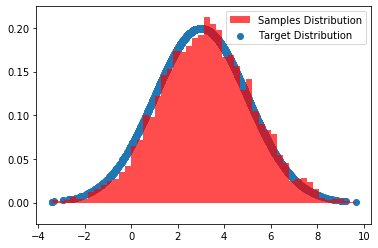

In [12]:
from scipy.stats import norm

def norm_dist_prob(theta):     # 定义一个正态密度函数
    y = norm.pdf(theta, loc=3, scale=2)
    return y

T = 5000
pi = [0 for i in range(T)]
sigma = 1
t = 0
while t < T-1:
    t = t + 1
    pi_star = norm.rvs(loc=pi[t - 1], scale=sigma, size=1, random_state=None)   #状态转移进行随机抽样
    alpha = min(1, (norm_dist_prob(pi_star[0]) / norm_dist_prob(pi[t - 1])))   #alpha值

    u = random.uniform(0, 1)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]


plt.scatter(pi, norm.pdf(pi, loc=3, scale=2),label='Target Distribution')
num_bins = 50
plt.hist(pi, num_bins, density=1, facecolor='red', alpha=0.7,label='Samples Distribution')
plt.legend()
plt.show()

总结一下，M-H采样在大数据环境下有两个问题：
- 假如数据特征非常多的话，M-H采样的接受率计算式在高维度数据环境下的效率十分低下。同时，$\alpha(i,j)$一般都是小于1的，所以有时候基本上都是被拒绝的。
- 同时，由于特征维度大，有时候算不出他的joint distribution，但是求出每个特征之间的条件概率分布还是可以的。

## 说到这里，估计大家也能理解接下来要讲什么了。gibbs抽样就是搞这个的

# Gibbs Sampling

怎么样重新寻找合适的细致平稳条件，这个篇幅实在太长了，就不写上来了，Google百度上面一大堆，讲的也很好，大家自己查查。

不过还是补充一点，Gibbs sampling不一定非要坐标轴轮换采样，按条件概率转移就好了，谁先谁后都行，轮换只是会方便一些。

#### 二维Gibbs采样

![](multin.png)

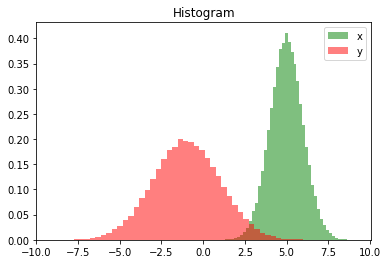

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

samplesource = multivariate_normal(mean=[5,-1], cov=[[1,0.5],[0.5,2]])

def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt(1 - rho ** 2) * s2))

def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), math.sqrt(1 - rho ** 2) * s1))

N = 5000
K = 20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2

rho = 0.5
y = m2

for i in range(N):
    for j in range(K):
        x = p_xgiveny(y, m1, m2, s1, s2)   #y给定得到x的采样
        y = p_ygivenx(x, m1, m2, s1, s2)   #x给定得到y的采样
        z = samplesource.pdf([x,y])
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)

num_bins = 50
plt.hist(x_res, num_bins, density=1, facecolor='green', alpha=0.5,label='x')
plt.hist(y_res, num_bins, density=1, facecolor='red', alpha=0.5,label='y')
plt.title('Histogram')
plt.legend()
plt.show()

这个是两个特征各自的分布

接下来整个立体的。

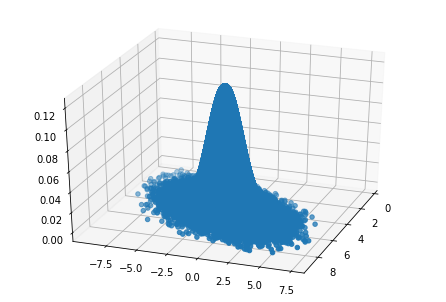

In [14]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(x_res, y_res, z_res,marker='o')
plt.show()

## 多维Gibbs网上也有很多，都是一个道理，这里就不列出来了，蔡老师那个就是多维的，大家可以挑战一下

# 总结：

Gibbs sampling是从M-H的一个特殊情况，它需要数据至少是二维，如果一维的就只能用M-H了。

Gibbs获取概率分布样本集，MCMC样本集模拟求和。